In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


num_transactions = 50_000
num_customers = 5_000
num_products = 200


customers = pd.DataFrame({
    'customer_id': range(1, num_customers + 1),
    'age': np.random.randint(18, 70, num_customers),
    'gender': np.random.choice(['Male', 'Female'], num_customers, p=[0.45, 0.55]),
    'city': np.random.choice(['Warszawa', 'Kraków', 'Wrocław', 'Poznań', 'Gdańsk'], num_customers, p=[0.3, 0.2, 0.2, 0.15, 0.15])
})


categories = ['Napoje', 'Przekąski', 'Alkohol', 'Produkty świeże', 'Nabiał', 'Pieczywo', 'Słodycze', 'Mrożonki']
products = pd.DataFrame({
    'product_id': range(1, num_products + 1),
    'category': np.random.choice(categories, num_products),
    'product_name': [f'Produkt_{i}' for i in range(1, num_products + 1)],
    'price': np.round(np.random.uniform(1.5, 30, num_products), 2)
})


transactions = pd.DataFrame({
    'transaction_id': range(1, num_transactions + 1),
    'customer_id': np.random.choice(customers['customer_id'], num_transactions),
    'product_id': np.random.choice(products['product_id'], num_transactions),
    'quantity': np.random.randint(1, 5, num_transactions),
    'purchase_date': pd.to_datetime(np.random.choice(pd.date_range('2024-01-01', '2024-12-31'), num_transactions))
})


merged_df = transactions.merge(customers, on='customer_id').merge(products, on='product_id')


In [3]:
transactions['month'] = transactions['purchase_date'].dt.month
transactions_per_month = transactions.groupby('month')['transaction_id'].count().sort_index()
transactions_per_month


month
1     4230
2     3899
3     4266
4     4108
5     4165
6     4176
7     4173
8     4298
9     4136
10    4247
11    4090
12    4212
Name: transaction_id, dtype: int64

In [4]:
merged_df['total_sales'] = merged_df['quantity'] * merged_df['price']
sales_per_category = merged_df.groupby('category')['total_sales'].sum().sort_values(ascending=False)
sales_per_category


category
Mrożonki           335187.09
Słodycze           310527.87
Alkohol            280503.22
Pieczywo           243303.24
Nabiał             239292.35
Napoje             228739.67
Przekąski          218903.32
Produkty świeże    200769.12
Name: total_sales, dtype: float64

In [5]:
avg_cart_value = merged_df.groupby('transaction_id')['total_sales'].sum().mean()
avg_cart_value


41.1445176

In [6]:
best_selling_product = merged_df.groupby('product_name')['quantity'].sum().idxmax()
best_selling_product


'Produkt_50'

In [7]:
avg_quantity_per_transaction = merged_df.groupby('transaction_id')['quantity'].sum().mean()
avg_quantity_per_transaction


2.50196

In [8]:
sales_per_city = merged_df.groupby('city')['total_sales'].sum().sort_values(ascending=False)
sales_per_city


city
Warszawa    584624.12
Wrocław     425583.11
Kraków      401123.62
Poznań      328081.61
Gdańsk      317813.42
Name: total_sales, dtype: float64

In [9]:
sales_per_gender = merged_df.groupby('gender')['total_sales'].sum()
sales_per_gender


gender
Female    1108361.52
Male       948864.36
Name: total_sales, dtype: float64

In [10]:
top_3_products = merged_df['product_name'].value_counts().head(3)
top_3_products


product_name
Produkt_31    302
Produkt_8     295
Produkt_50    290
Name: count, dtype: int64

In [11]:
avg_price_per_category = products.groupby('category')['price'].mean().sort_values(ascending=False)
avg_price_per_category


category
Pieczywo           19.723000
Produkty świeże    17.590000
Mrożonki           16.179091
Słodycze           16.097742
Nabiał             16.017391
Alkohol            15.683793
Przekąski          15.657727
Napoje             15.364583
Name: price, dtype: float64

In [12]:
merged_df['day_of_week'] = merged_df['purchase_date'].dt.day_name()
transactions_per_day = merged_df['day_of_week'].value_counts()
transactions_per_day


day_of_week
Tuesday      7323
Monday       7249
Thursday     7247
Sunday       7154
Wednesday    7039
Saturday     7005
Friday       6983
Name: count, dtype: int64

In [13]:
top_customers = merged_df.groupby('customer_id')['total_sales'].sum().nlargest(5)
top_customers


customer_id
440     1088.66
643     1034.82
3840    1033.48
1010     995.16
733      992.83
Name: total_sales, dtype: float64

In [14]:
avg_transactions_per_customer = merged_df.groupby('customer_id')['transaction_id'].nunique().mean()
avg_transactions_per_customer


10.0

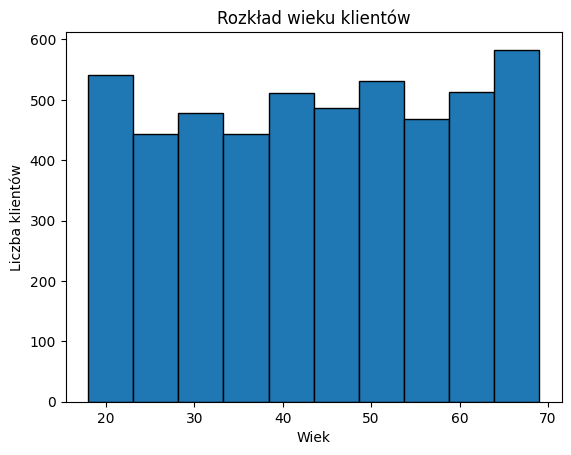

In [15]:


plt.hist(customers['age'], bins=10, edgecolor='black')
plt.xlabel('Wiek')
plt.ylabel('Liczba klientów')
plt.title('Rozkład wieku klientów')
plt.show()


<Axes: title={'center': 'Średnia wartość transakcji w miesiącach'}, xlabel='purchase_date'>

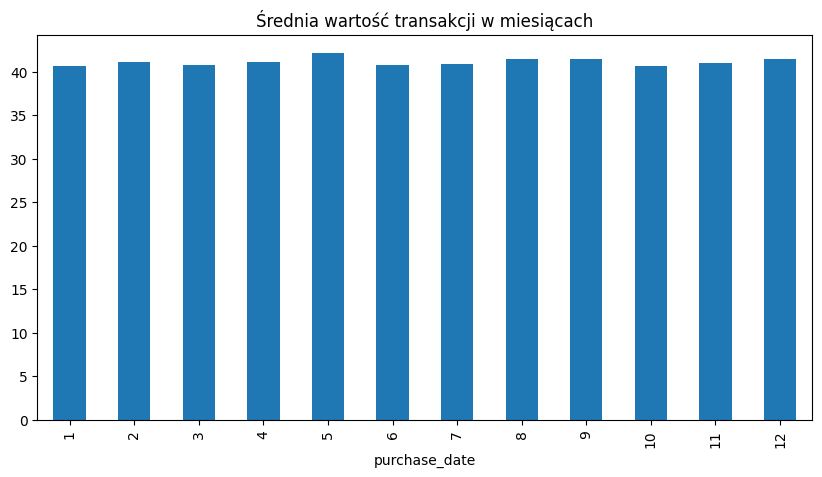

In [16]:
avg_sales_per_month = merged_df.groupby(merged_df['purchase_date'].dt.month)['total_sales'].mean()
avg_sales_per_month.plot(kind='bar', figsize=(10,5), title='Średnia wartość transakcji w miesiącach')


In [17]:
popular_category_by_gender = merged_df.groupby(['gender', 'category'])['transaction_id'].count().reset_index()
popular_category_by_gender = popular_category_by_gender.loc[popular_category_by_gender.groupby('gender')['transaction_id'].idxmax()]
popular_category_by_gender


,gender,category,transaction_id
1,Female,Mrożonki,4378
9,Male,Mrożonki,3761


In [18]:
avg_products_per_transaction = merged_df.groupby('transaction_id')['product_id'].nunique().mean()
avg_products_per_transaction


1.0

In [19]:
customer_loyalty = merged_df.groupby('customer_id').agg({'transaction_id': 'count', 'total_sales': 'sum'})
customer_loyalty.corr()


,transaction_id,total_sales
transaction_id,1.000000,0.824629
total_sales,0.824629,1.000000


In [20]:
sales_per_day = merged_df.groupby(merged_df['purchase_date'].dt.day_name())['total_sales'].sum().sort_values(ascending=False)
sales_per_day


purchase_date
Tuesday      301598.75
Monday       298020.99
Thursday     297932.23
Sunday       294347.83
Wednesday    289631.46
Friday       288824.14
Saturday     286870.48
Name: total_sales, dtype: float64

In [21]:
sales_pivot = merged_df.pivot_table(index='city', columns='category', values='total_sales', aggfunc='sum')
sales_pivot


category,Alkohol,Mrożonki,Nabiał,Napoje,Pieczywo,Produkty świeże,Przekąski,Słodycze
city,,,,,,,,
Gdańsk,43944.06,50835.53,37276.19,35101.31,37227.87,30561.58,34376.29,48490.59
Kraków,52874.76,68098.59,47023.36,44738.23,48357.89,38892.19,40430.17,60708.43
Poznań,47578.39,53438.07,37509.82,35590.58,38201.02,31227.06,35060.39,49476.28
Warszawa,78650.63,91439.69,69542.08,65746.37,69823.54,58237.61,62831.04,88353.16
Wrocław,57455.38,71375.21,47940.90,47563.18,49692.92,41850.68,46205.43,63499.41


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


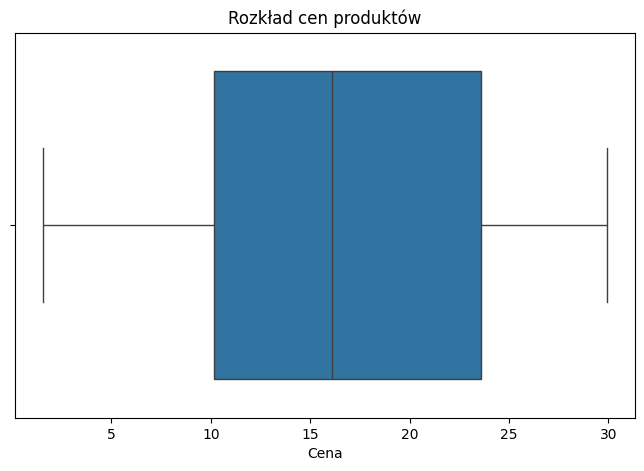

In [22]:
import seaborn as sns

plt.figure(figsize=(8,5))
sns.boxplot(x=products['price'])
plt.title('Rozkład cen produktów')
plt.xlabel('Cena')
plt.show()


In [23]:
merged_df['quarter'] = merged_df['purchase_date'].dt.to_period('Q')
customers_per_quarter = merged_df.groupby('quarter')['customer_id'].nunique()
customers_per_quarter


quarter
2024Q1    4632
2024Q2    4582
2024Q3    4594
2024Q4    4593
Freq: Q-DEC, Name: customer_id, dtype: int64

In [24]:
last_purchase = merged_df.groupby('customer_id')['purchase_date'].max()
days_since_last = (pd.Timestamp('2025-01-01') - last_purchase).dt.days
days_since_last.head()


customer_id
1    82
2    36
3     5
4     2
5    25
Name: purchase_date, dtype: int64

In [25]:
one_time_buyers = merged_df.groupby('customer_id')['transaction_id'].nunique()
one_time_buyers = (one_time_buyers == 1).sum()
one_time_buyers


4

In [26]:
months_per_customer = merged_df.groupby('customer_id')['purchase_date'].apply(lambda x: x.dt.month.nunique())
active_customers = (months_per_customer >= 3).sum()
active_customers


4978

In [27]:
bins = [17, 25, 35, 50, 70]
labels = ['18-25', '26-35', '36-50', '51-70']
merged_df['age_group'] = pd.cut(merged_df['age'], bins=bins, labels=labels)
sales_by_age_group = merged_df.groupby('age_group')['total_sales'].sum()
sales_by_age_group


C:\Users\USER\AppData\Local\Temp\ipykernel_24176\2771851116.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_age_group = merged_df.groupby('age_group')['total_sales'].sum()


age_group
18-25    288729.15
26-35    379725.80
36-50    608021.97
51-70    780748.96
Name: total_sales, dtype: float64

In [28]:
category_counts = merged_df.groupby('category')['transaction_id'].count().sort_values(ascending=False)
category_counts


category
Mrożonki           8139
Słodycze           7665
Alkohol            7157
Nabiał             5961
Napoje             5958
Przekąski          5560
Pieczywo           5016
Produkty świeże    4544
Name: transaction_id, dtype: int64

<Axes: title={'center': 'Transakcje tygodniowo (trend)'}, xlabel='purchase_date'>

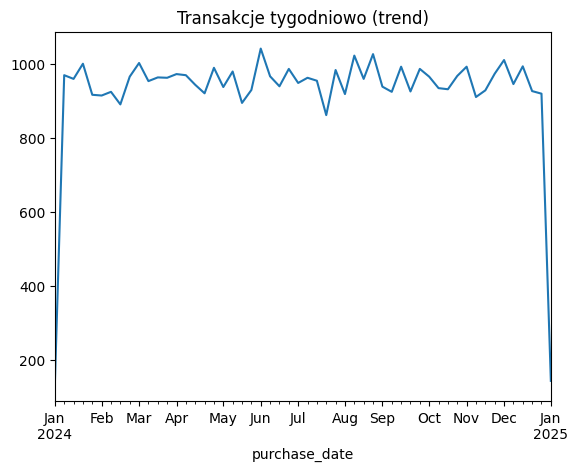

In [29]:
weekly_sales = merged_df.resample('W-Mon', on='purchase_date')['transaction_id'].count()
weekly_sales.plot(title='Transakcje tygodniowo (trend)')


<Axes: title={'center': 'Zakupy wg dnia miesiąca'}, xlabel='purchase_date'>

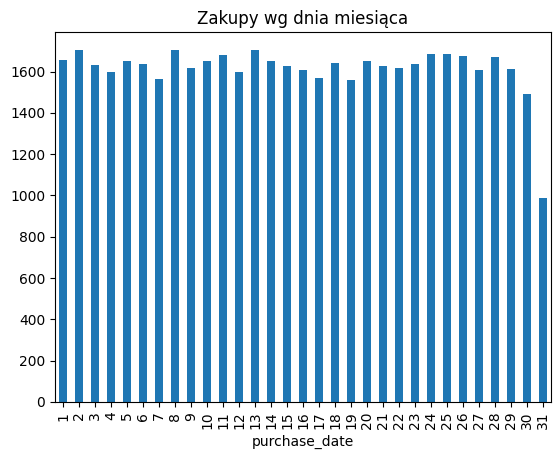

In [31]:
day_of_month = merged_df['purchase_date'].dt.day.value_counts().sort_index()
day_of_month.plot(kind='bar', title='Zakupy wg dnia miesiąca')



<Axes: xlabel='category', ylabel='city'>

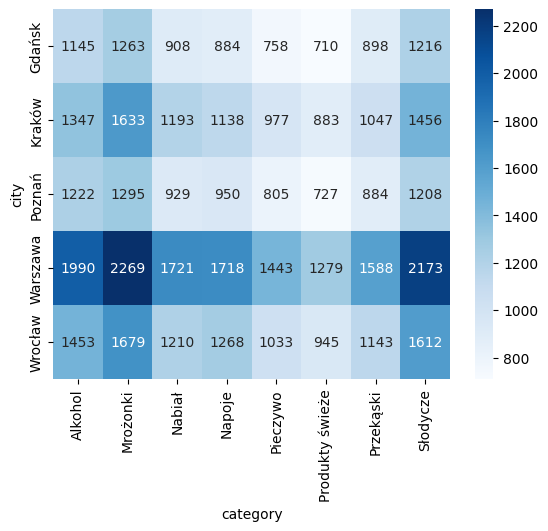

In [32]:
pivot = merged_df.pivot_table(index='city', columns='category', values='transaction_id', aggfunc='count')
import seaborn as sns
sns.heatmap(pivot, cmap='Blues', annot=True, fmt='g')


In [33]:
transactions_per_person = merged_df.groupby(['gender', 'customer_id'])['transaction_id'].nunique().groupby('gender').mean()
transactions_per_person


gender
Female    10.039807
Male       9.953720
Name: transaction_id, dtype: float64

In [34]:
most_expensive_per_category = products.loc[products.groupby('category')['price'].idxmax()][['category', 'product_name', 'price']]
most_expensive_per_category


,category,product_name,price
46,Alkohol,Produkt_47,29.85
94,Mrożonki,Produkt_95,29.46
101,Nabiał,Produkt_102,27.28
197,Napoje,Produkt_198,29.71
96,Pieczywo,Produkt_97,29.92
36,Produkty świeże,Produkt_37,28.63
7,Przekąski,Produkt_8,29.81
108,Słodycze,Produkt_109,28.99
